<a href="https://colab.research.google.com/github/061095/biblioteca_pandas_/blob/main/Analise_Dados_Salao_Danca_(1)_(1)final_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<span style="color:blue; font-family:verdana; font-size:40px;">📊 Análise Financeira e Estratégica do Salão de Dança 💃🕺</span>**






#1-Introdução

##A análise contida no notebook "Análise Financeira e Estratégica do Salão de Dança" abrange várias etapas detalhadas para fornecer uma visão aprofundada sobre a situação financeira do salão de dança.
##O objetivo principal é identificar padrões nos dados financeiros e fornecer recomendações estratégicas para melhorar a gestão financeira do salão de dança.

#2-Importação das bibliotecas e Carregamento dos dados.

##Importação das bibliotecas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


##Carregamento dos dados.
Essencialmente, o carregamento de dados é adaptativo e pode ser personalizado para se adequar à estrutura e necessidades específicas de cada conjunto de dados, garantindo que o analista tenha um ponto de partida sólido para explorar e modelar os dados.

In [ ]:
df_despesa = pd.read_excel('/content/despesa.xlsx')
df_receita = pd.read_excel('/content/receita.xlsx')
df_mkt= pd.read_excel('/content/Investimento_MKT (1).xlsx')

# 3-Leitura e intepretações e tratamento dos dados.

Este processo é iterativo e pode requerer várias passagens à medida que novos insights sobre os dados emergem ou novas questões de pesquisa são formuladas. A precisão na leitura, interpretação e tratamento dos dados é crucial para obter insights válidos e confiáveis a partir de qualquer análise subsequente.

In [ ]:
despesa_head = df_despesa.head()
receita_head = df_receita.head()
mkt_head = df_mkt.head()

despesa_head, receita_head, mkt_head

(        Data Descrição   Valor              Tipo
 0 2023-01-03    Sabesp   59.46  Retirada pessoal
 1 2023-01-05       EDP  226.15          Despesas
 2 2023-01-05    Sabesp  119.15          Despesas
 3 2023-01-09       EDP   97.71  Retirada pessoal
 4 2023-01-12  Internet  140.12          Despesas,
         Data       Descrição   Valor      Tipo
 0 2023-01-11  #CLIENTE#23017  244.02    Débito
 1 2023-01-12  #CLIENTE#23018  199.00  Dinheiro
 2 2023-01-13  #CLIENTE#23002  237.12   Crédito
 3 2023-01-13  #CLIENTE#23003  237.12   Crédito
 4 2023-01-14  #CLIENTE#23007  250.00  Dinheiro,
               Trimestre  Cliques  ImpressÃµes CPC mÃ©dio    Custo
 0  1º trimestre de 2017        0            0    R$ 0,00  R$ 0,00
 1  2º trimestre de 2017        0            0    R$ 0,00  R$ 0,00
 2  3º trimestre de 2017        0            0    R$ 0,00  R$ 0,00
 3  4º trimestre de 2017        0            0    R$ 0,00  R$ 0,00
 4  1º trimestre de 2018        0            0    R$ 0,00  R$ 0,00)

In [ ]:
despesa_shape = df_despesa.shape
receita_shape = df_receita.shape
mkt_shape = df_mkt.shape

despesa_shape, receita_shape, mkt_shape

((494, 4), (1311, 4), (30, 5))

In [ ]:
descricao_despesa = df_despesa.describe(include='all')
descricao_receita = df_receita.describe(include='all')
descricao_mkt = df_mkt.describe(include='all')

In [ ]:
df_despesa['Valor']=df_despesa['Valor'].abs()

In [ ]:
df_despesa.describe()

,Data,Valor
count,494,494.000000
mean,2023-09-02 16:45:40.080971776,1015.540972
min,2023-01-03 00:00:00,1.990000
25%,2023-05-05 18:00:00,145.310000
50%,2023-09-05 00:00:00,376.430000
75%,2023-12-30 12:00:00,871.417500
max,2024-04-30 00:00:00,8108.180000
std,NaN,1638.173218


In [ ]:
df_receita.describe()

,Data,Valor
count,1311,1311.000000
mean,2023-09-02 03:37:28.970251776,366.111388
min,2023-01-11 00:00:00,11.860000
25%,2023-05-01 00:00:00,339.220000
50%,2023-09-01 00:00:00,357.000000
75%,2024-01-01 00:00:00,367.730000
max,2024-04-24 00:00:00,21213.050000
std,NaN,607.967900


In [ ]:
df_mkt

,Trimestre,Cliques,ImpressÃµes,CPC mÃ©dio,Custo
0,1º trimestre de 2017,0,0,"R$ 0,00","R$ 0,00"
1,2º trimestre de 2017,0,0,"R$ 0,00","R$ 0,00"
2,3º trimestre de 2017,0,0,"R$ 0,00","R$ 0,00"
3,4º trimestre de 2017,0,0,"R$ 0,00","R$ 0,00"
4,1º trimestre de 2018,0,0,"R$ 0,00","R$ 0,00"
5,2º trimestre de 2018,0,0,"R$ 0,00","R$ 0,00"
6,3º trimestre de 2018,0,0,"R$ 0,00","R$ 0,00"
7,4º trimestre de 2018,0,0,"R$ 0,00","R$ 0,00"
8,1º trimestre de 2019,0,0,"R$ 0,00","R$ 0,00"
9,2º trimestre de 2019,0,0,"R$ 0,00","R$ 0,00"


In [ ]:
nulos_despesas = df_despesa.isnull().sum()
nulos_investimentos = df_mkt.isnull().sum()
nulos_receitas = df_receita.isnull().sum()

nulos_despesas, nulos_investimentos, nulos_receitas

(Data         0
 Descrição    0
 Valor        0
 Tipo         0
 dtype: int64,
 Trimestre      0
 Cliques        0
 ImpressÃµes    0
 CPC mÃ©dio     0
 Custo          0
 dtype: int64,
 Data         0
 Descrição    0
 Valor        0
 Tipo         0
 dtype: int64)

In [ ]:
df_despesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       494 non-null    datetime64[ns]
 1   Descrição  494 non-null    object        
 2   Valor      494 non-null    float64       
 3   Tipo       494 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.6+ KB


In [ ]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       1311 non-null   datetime64[ns]
 1   Descrição  1311 non-null   object        
 2   Valor      1311 non-null   float64       
 3   Tipo       1311 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 41.1+ KB


In [ ]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Trimestre   6 non-null      object 
 1   Cliques     6 non-null      float64
 2   Impressões  6 non-null      float64
 3   CPC médio   6 non-null      object 
 4   Custo       6 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


#4-Análise Exploratória dos Dados (EDA)
##A análise exploratória visa entender a distribuição dos dados e identificar padrões iniciais. Foram gerados gráficos de barras para visualizar as receitas e despesas por categoria e ao longo do tempo, facilitando a identificação de tendências e outliers.

<ipython-input-124-31e10dfe4308>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


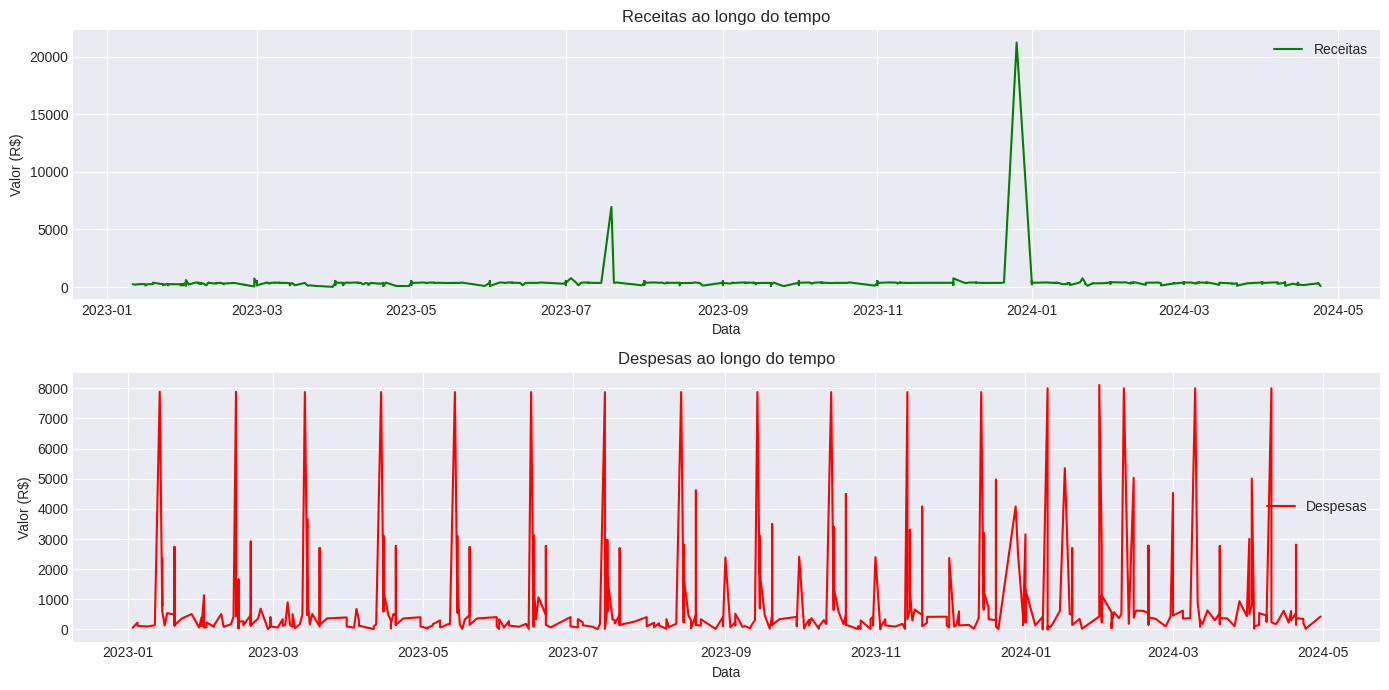

In [ ]:
plt.style.use('seaborn-darkgrid')

# Gráfico de Receitas e Despesas ao longo do tempo
plt.figure(figsize=(14, 7))

# Receitas
plt.subplot(2, 1, 1)
plt.plot(df_receita['Data'], df_receita['Valor'], label='Receitas', color='green')
plt.title('Receitas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.legend()

# Despesas
plt.subplot(2, 1, 2)
plt.plot(df_despesa['Data'], df_despesa['Valor'], label='Despesas', color='red')
plt.title('Despesas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.legend()

plt.tight_layout()
plt.show()

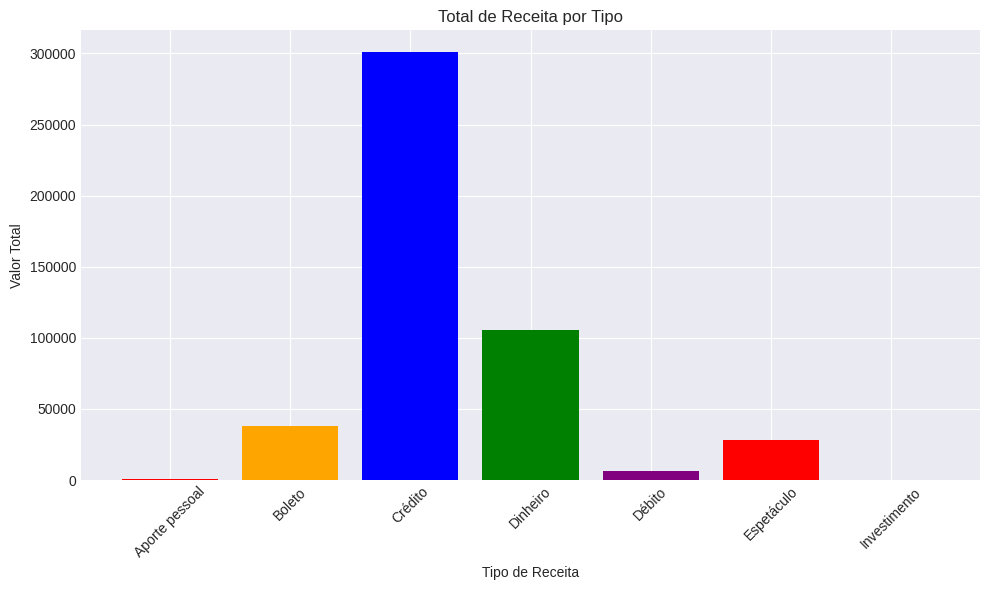

In [ ]:
tipo_receita = df_receita.groupby('Tipo')['Valor'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(tipo_receita['Tipo'], tipo_receita['Valor'], color=['red', 'orange', 'blue', 'green', 'purple'])
plt.xlabel('Tipo de Receita')
plt.ylabel('Valor Total')
plt.title('Total de Receita por Tipo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

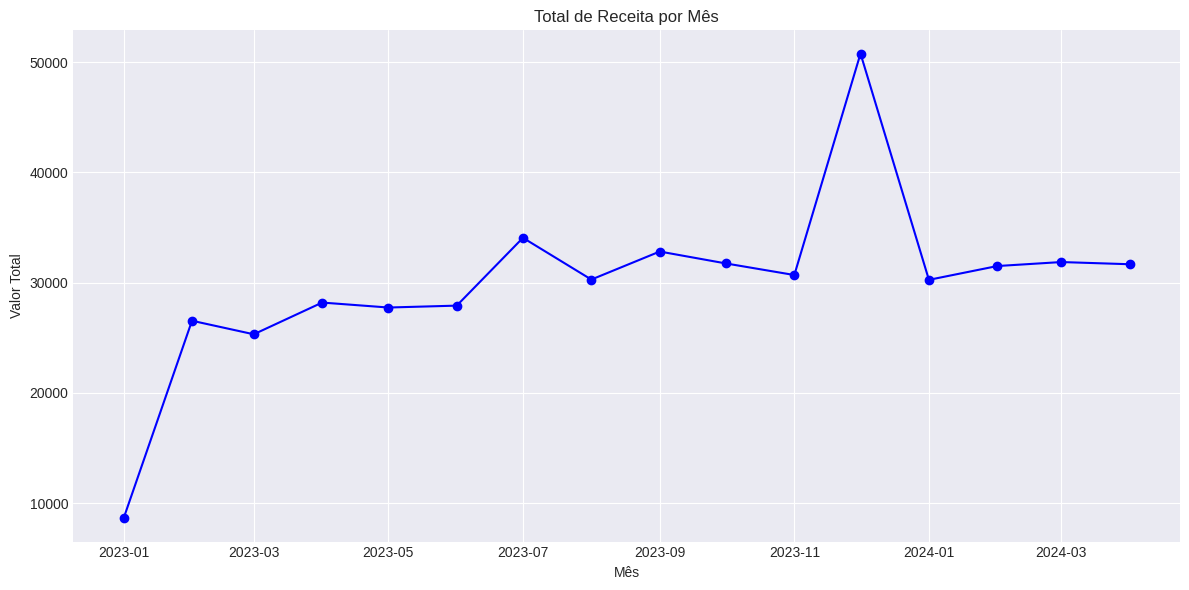

In [ ]:
df_receita['Mes'] = df_receita['Data'].dt.to_period('M')
receita_mensal = df_receita.groupby('Mes')['Valor'].sum().reset_index()

receita_mensal['Mes'] = receita_mensal['Mes'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(receita_mensal['Mes'], receita_mensal['Valor'], marker='o', linestyle='-', color='blue')
plt.xlabel('Mês')
plt.ylabel('Valor Total')
plt.title('Total de Receita por Mês')
plt.grid(True)
plt.tight_layout()
plt.show()


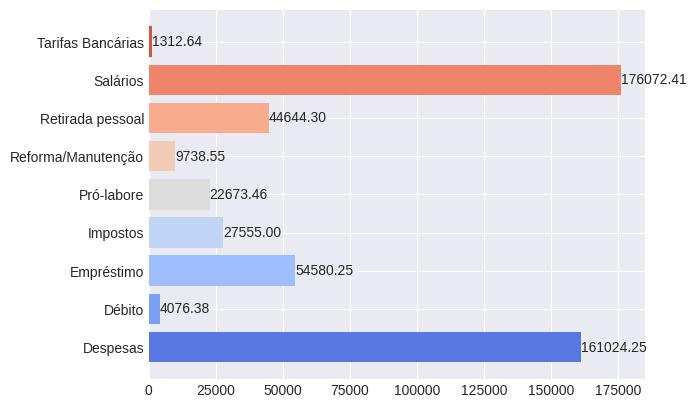

In [ ]:

tipo_despesa = df_despesa.groupby('Tipo', as_index=False)['Valor'].sum()

colors = sns.color_palette("coolwarm", len(tipo_despesa['Tipo']))

fig, ax = plt.subplots()
bars = ax.barh(tipo_despesa['Tipo'], tipo_despesa['Valor'], color=colors)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 35
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.show()




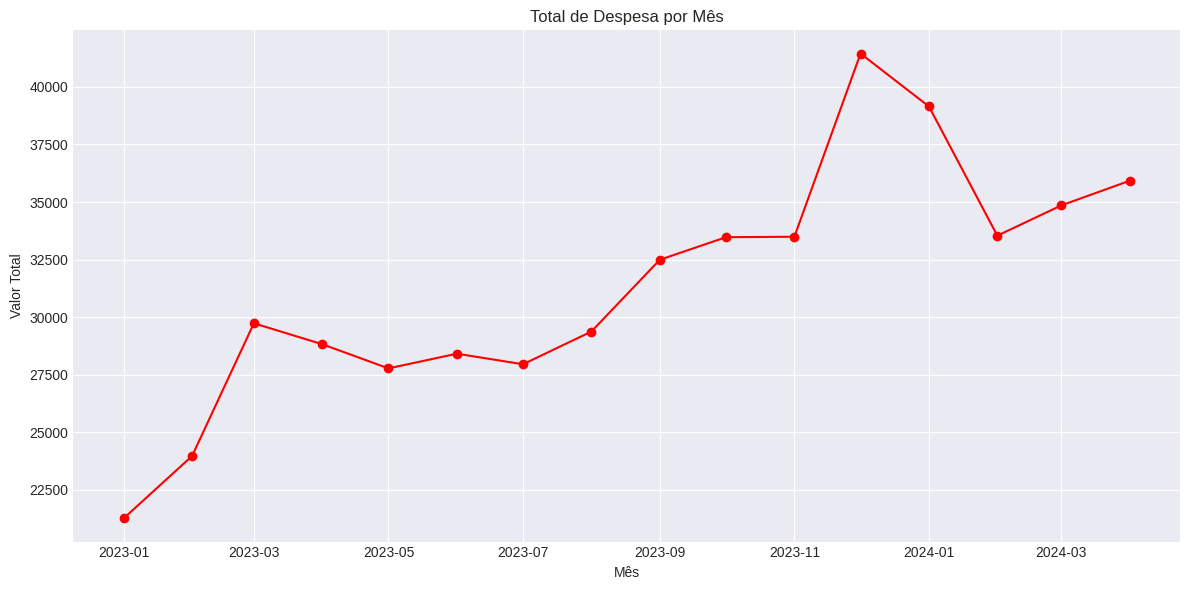

In [ ]:
df_despesa['Data'] = pd.to_datetime(df_despesa['Data'])
df_despesa['Mes'] = df_despesa['Data'].dt.to_period('M')
despesa_mensal = df_despesa.groupby('Mes')['Valor'].sum().reset_index()

despesa_mensal['Mes'] = despesa_mensal['Mes'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(despesa_mensal['Mes'], despesa_mensal['Valor'], marker='o', linestyle='-', color='red')
plt.xlabel('Mês')
plt.ylabel('Valor Total')
plt.title('Total de Despesa por Mês')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_mkt['Cliques'] = df_mkt['Cliques'].apply(lambda x: int(str(x).replace('.', '').replace(' ', '')))
df_mkt['Impressões'] = df_mkt['Impressões'].apply(lambda x: int(str(x).replace('.', '').replace(' ', '')))

df_mkt['Custo'] = df_mkt['Custo'].apply(lambda x: float(str(x).replace('R$', '').replace(',', '.').replace(' ', '')))

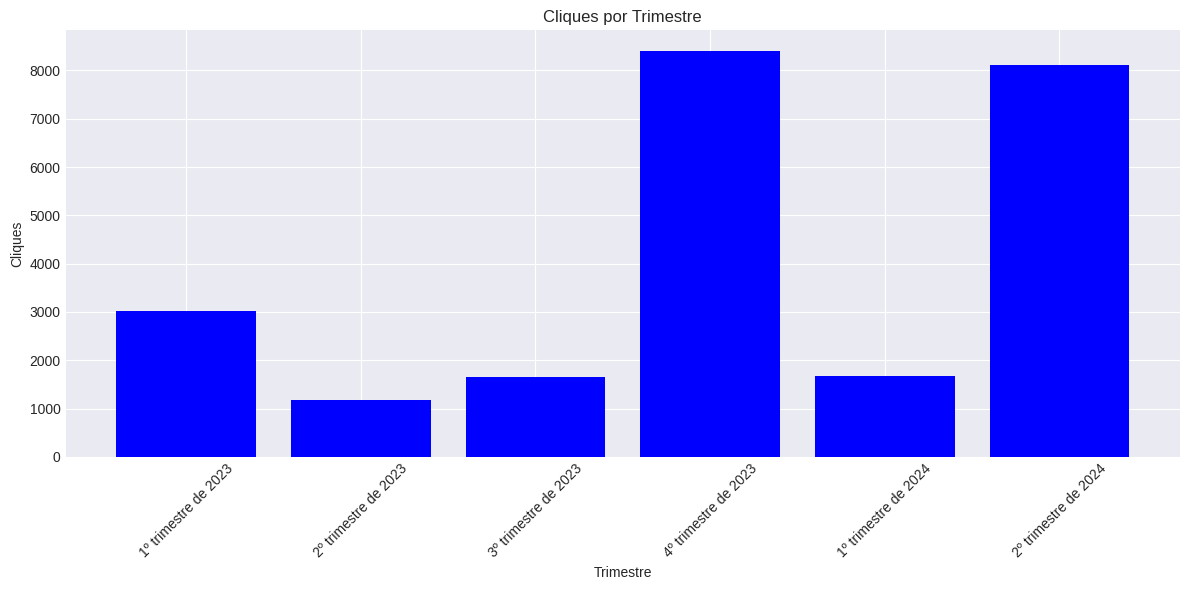

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_mkt['Trimestre'], df_mkt['Cliques'], color='blue')
plt.xlabel('Trimestre')
plt.ylabel('Cliques')
plt.title('Cliques por Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

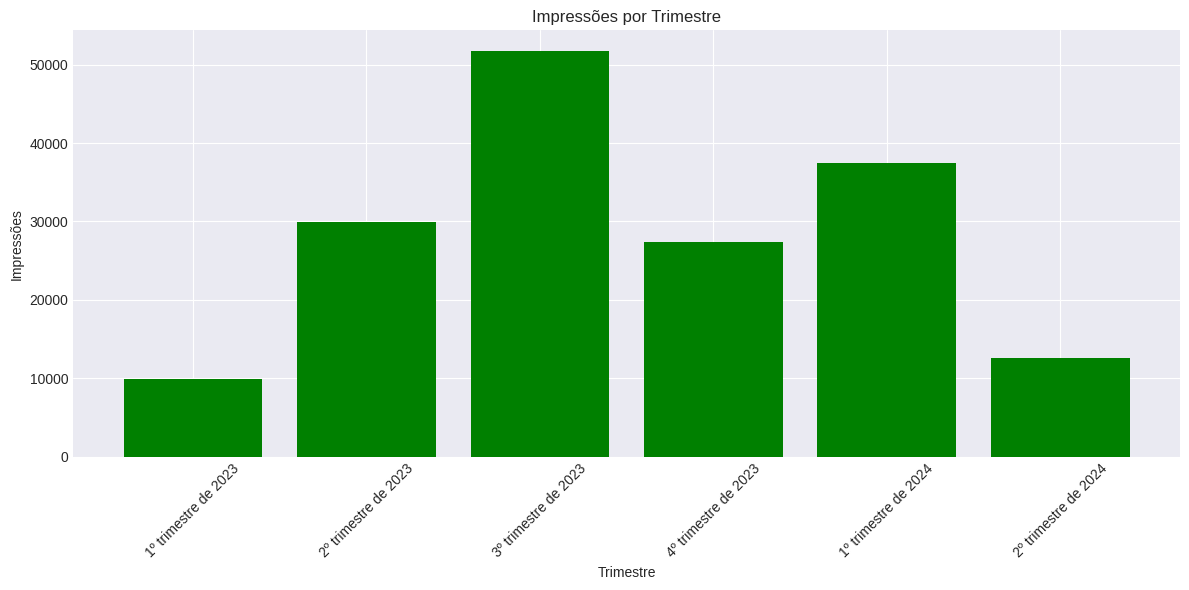

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_mkt['Trimestre'], df_mkt['Impressões'], color='green')
plt.xlabel('Trimestre')
plt.ylabel('Impressões')
plt.title('Impressões por Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

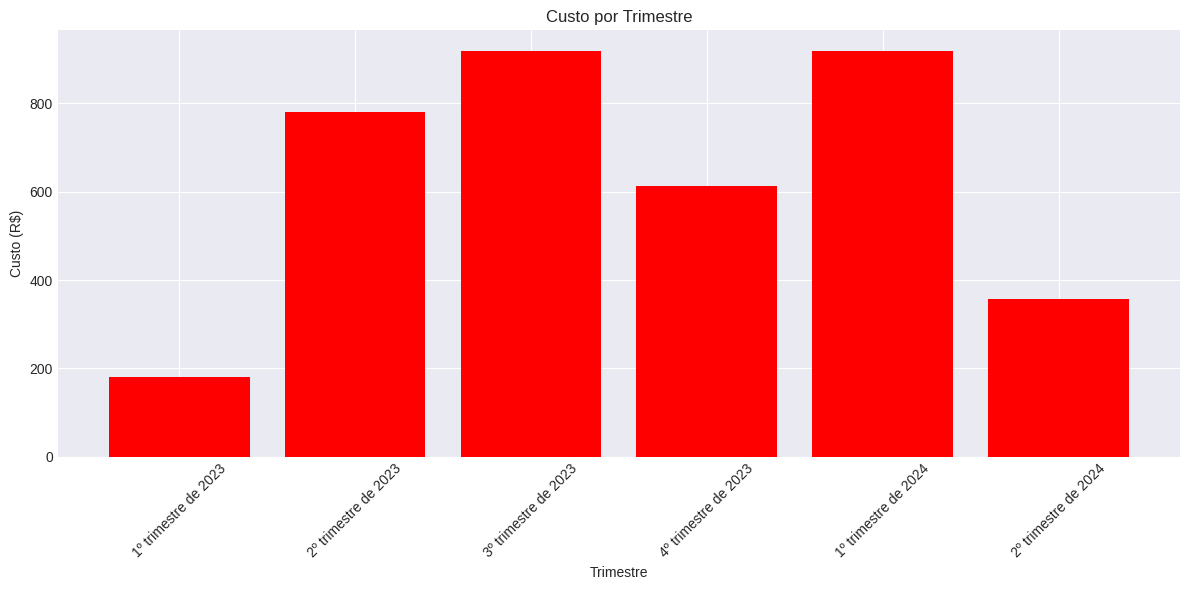

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_mkt['Trimestre'], df_mkt['Custo'], color='red')
plt.xlabel('Trimestre')
plt.ylabel('Custo (R$)')
plt.title('Custo por Trimestre')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# 5-Verificações de outliers
##Após identificar os outliers, podemos tratá-los de várias maneiras, como removê-los, substituí-los ou ajustá-los. A escolha do método depende do contexto e do impacto esperado nos resultados.

<ipython-input-150-cf67e1cc09d2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


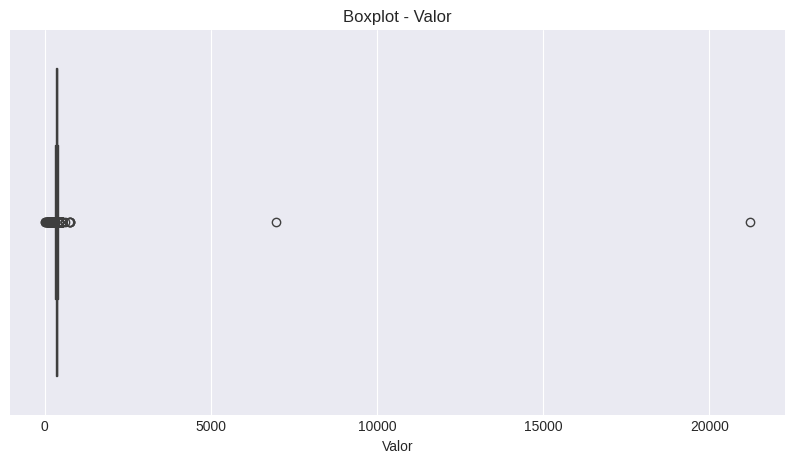

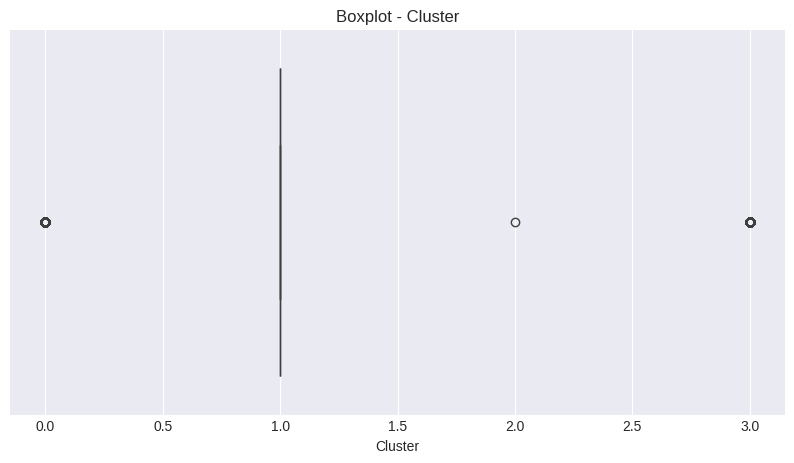

In [ ]:

plt.style.use('seaborn-darkgrid')


def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()

numeric_columns = df_receita.select_dtypes(include='number').columns

plot_boxplots(df_receita, numeric_columns)

In [ ]:
def calculate_outliers_limits(df, columns):
    outliers_limits = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_limits[col] = (lower_bound, upper_bound)
    return outliers_limits

outliers_limits = calculate_outliers_limits(df_receita, numeric_columns)
outliers_limits

{'Valor': (296.45500000000004, 410.495)}

In [ ]:
for col, limits in outliers_limits.items():
    lower_bound, upper_bound = limits
    outliers = df_receita[(df_receita[col] < lower_bound) | (df_receita[col] > upper_bound)]
    print(f'Outliers na coluna {col}:')
    print(outliers)
    print('\n')

Outliers na coluna Valor:
           Data       Descrição   Valor      Tipo      Mes
0    2023-01-11  #CLIENTE#23017  244.02    Débito  2023-01
1    2023-01-12  #CLIENTE#23018  199.00  Dinheiro  2023-01
2    2023-01-13  #CLIENTE#23002  237.12   Crédito  2023-01
3    2023-01-13  #CLIENTE#23003  237.12   Crédito  2023-01
4    2023-01-14  #CLIENTE#23007  250.00  Dinheiro  2023-01
...         ...             ...     ...       ...      ...
1303 2024-04-13  #CLIENTE#23049  286.40    Boleto  2024-04
1304 2024-04-15  #CLIENTE#23021  185.00  Dinheiro  2024-04
1306 2024-04-15  #CLIENTE#24024  230.00  Dinheiro  2024-04
1307 2024-04-17  #CLIENTE#24024  164.07   Crédito  2024-04
1310 2024-04-24  #CLIENTE#24025   82.03   Crédito  2024-04

[198 rows x 5 columns]




In [ ]:
specific_outliers = {}
for col in numeric_columns:
    outliers = df_receita[(df_receita[col] >= 7000) & (df_receita[col] <= 30000)]
    specific_outliers[col] = outliers

for col, outliers in specific_outliers.items():
    print(f'Outliers na coluna {col} entre 7000 e 30000:')
    print(outliers)
    print('\n')

Outliers na coluna Valor entre 7000 e 30000:
          Data                 Descrição     Valor        Tipo      Mes
959 2023-12-26  Espetáculo de fim de ano  21213.05  Espetáculo  2023-12





#Conclusão sobre Outliers

##Os outliers identificados durante a análise são dados preciosos que podem fornecer insights valiosos sobre eventos ou comportamentos atípicos. Embora os outliers possam distorcer análises estatísticas e afetar a precisão dos modelos de machine learning, sua presença deve ser cuidadosamente considerada e, em muitos casos, não devem ser removidos. Em vez disso, a decisão de como tratá-los deve ser baseada no contexto e nos objetivos específicos da análise.s.

#6-Modelagem
##Através deste processo, demonstramos como aplicar o algoritmo K-Means, preparar os dados corretamente e determinar o número ideal de clusters usando o método do cotovelo. Esta abordagem é extremamente útil em análises exploratórias de dados para identificar padrões e segmentar dados em grupos semelhantes

In [ ]:
data_for_clustering = df_receita[['Valor', 'Tipo']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Valor']),
        ('cat', OneHotEncoder(), ['Tipo'])
    ])

data_prepared = preprocessor.fit_transform(data_for_clustering)

column_names = ['Coluna1', 'Coluna2', 'Coluna3', 'Coluna4', 'Coluna5', 'Coluna6', 'Coluna7', 'Coluna8']
df_generic = pd.DataFrame(data_prepared.toarray(), columns=column_names)
print(df_generic.head())


    Coluna1  Coluna2  Coluna3  Coluna4  Coluna5  Coluna6  Coluna7  Coluna8
0 -0.200895      0.0      0.0      0.0      0.0      1.0      0.0      0.0
1 -0.274974      0.0      0.0      0.0      1.0      0.0      0.0      0.0
2 -0.212249      0.0      0.0      1.0      0.0      0.0      0.0      0.0
3 -0.212249      0.0      0.0      1.0      0.0      0.0      0.0      0.0
4 -0.191056      0.0      0.0      0.0      1.0      0.0      0.0      0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


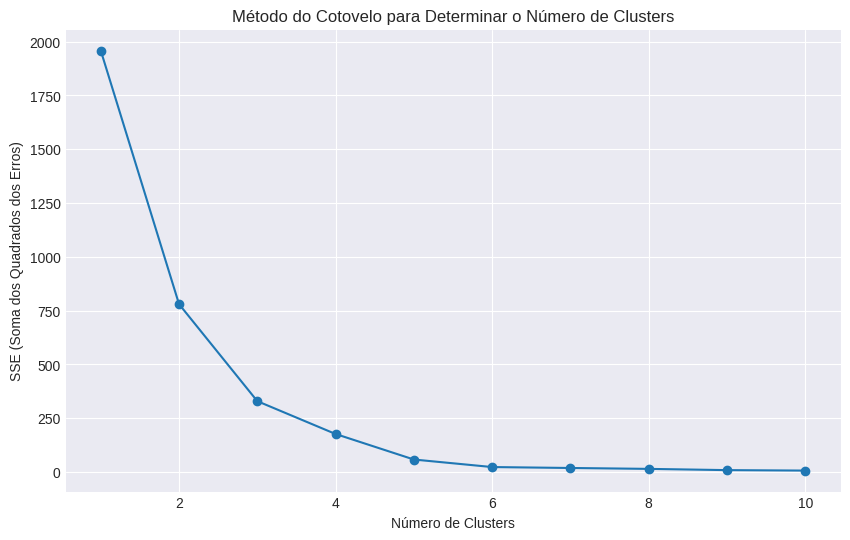

In [ ]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_prepared)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Soma dos Quadrados dos Erros)')
plt.grid(True)
plt.show()

# 7-Análise de Resultados
##Criação de gráficos para visualização clara dos clusters e dos padrões financeiros.
##Análise detalhada dos resultados para identificar áreas de melhoria e oportunidades estratégicas.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_prepared)

df_receita['Cluster'] = clusters

cluster_profile = df_receita.groupby('Cluster').agg({
    'Valor': 'mean',
    'Tipo': lambda x: x.mode()[0]
})

cluster_profile

,Valor,Tipo
Cluster,,
0,346.148459,Dinheiro
1,344.195143,Crédito
2,21213.050000,Espetáculo
3,400.099615,Boleto


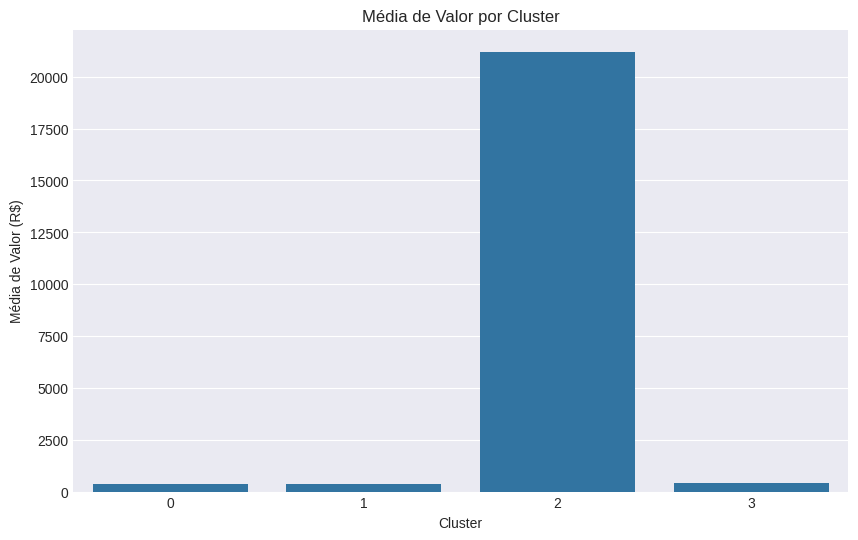

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_profile.index, y='Valor', data=cluster_profile)
plt.title('Média de Valor por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de Valor (R$)')
plt.show()

#8-Previsão de Receita e Despesa

In [ ]:
import pandas as pd

# Carregar os dados de receitas e despesas
file_path_receita = '/content/receita.xlsx'
file_path_despesa = '/content/despesa.xlsx'

df_receita = pd.read_excel(file_path_receita)
df_despesa = pd.read_excel(file_path_despesa)

# Exibir as primeiras linhas dos dataframes
df_receita.head(), df_despesa.head()

(        Data       Descrição   Valor      Tipo
 0 2023-01-11  #CLIENTE#23017  244.02    Débito
 1 2023-01-12  #CLIENTE#23018  199.00  Dinheiro
 2 2023-01-13  #CLIENTE#23002  237.12   Crédito
 3 2023-01-13  #CLIENTE#23003  237.12   Crédito
 4 2023-01-14  #CLIENTE#23007  250.00  Dinheiro,
         Data Descrição   Valor              Tipo
 0 2023-01-03    Sabesp   59.46  Retirada pessoal
 1 2023-01-05       EDP  226.15          Despesas
 2 2023-01-05    Sabesp  119.15          Despesas
 3 2023-01-09       EDP   97.71  Retirada pessoal
 4 2023-01-12  Internet  140.12          Despesas)

In [ ]:
# Converter colunas de datas para o tipo datetime
df_receita['Data'] = pd.to_datetime(df_receita['Data'])
df_despesa['Data'] = pd.to_datetime(df_despesa['Data'])

# Remover sinais de menos dos valores da receita
df_receita['Valor'] = df_receita['Valor'].abs()

# Preencher valores ausentes, se houver
df_receita.fillna(method='ffill', inplace=True)
df_despesa.fillna(method='ffill', inplace=True)

# Exibir informações dos dataframes
df_receita.info(), df_despesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       1311 non-null   datetime64[ns]
 1   Descrição  1311 non-null   object        
 2   Valor      1311 non-null   float64       
 3   Tipo       1311 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 41.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       494 non-null    datetime64[ns]
 1   Descrição  494 non-null    object        
 2   Valor      494 non-null    float64       
 3   Tipo       494 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.6+ KB


(None, None)

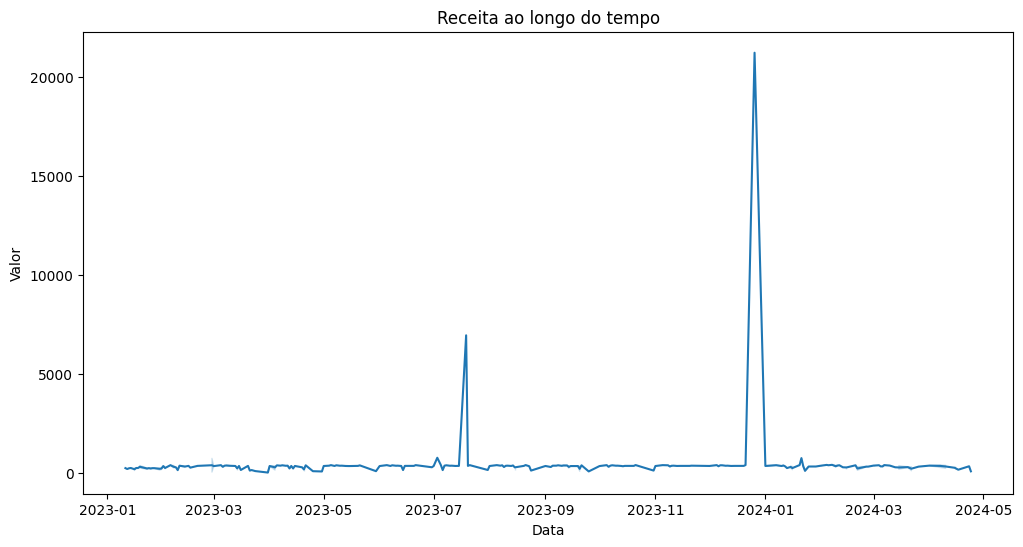

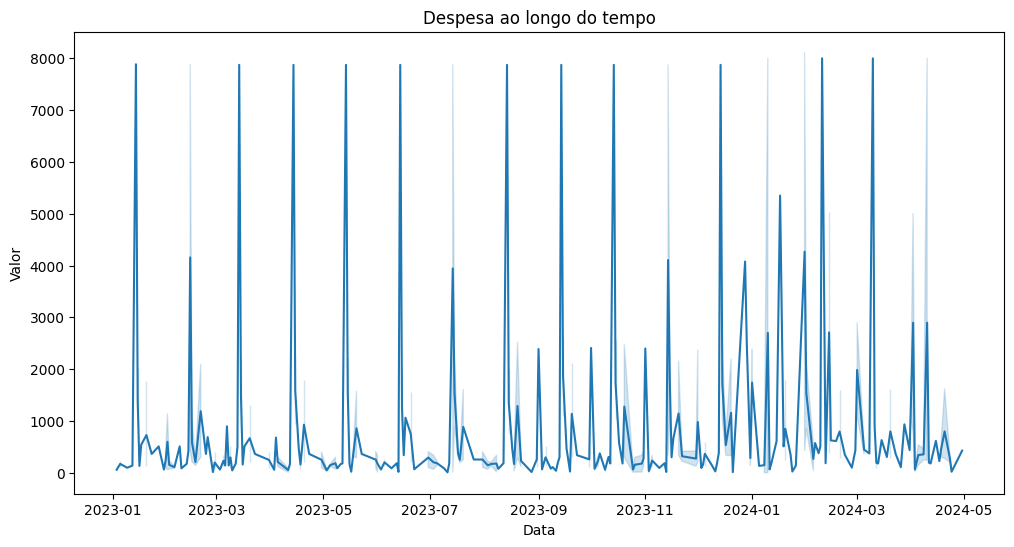

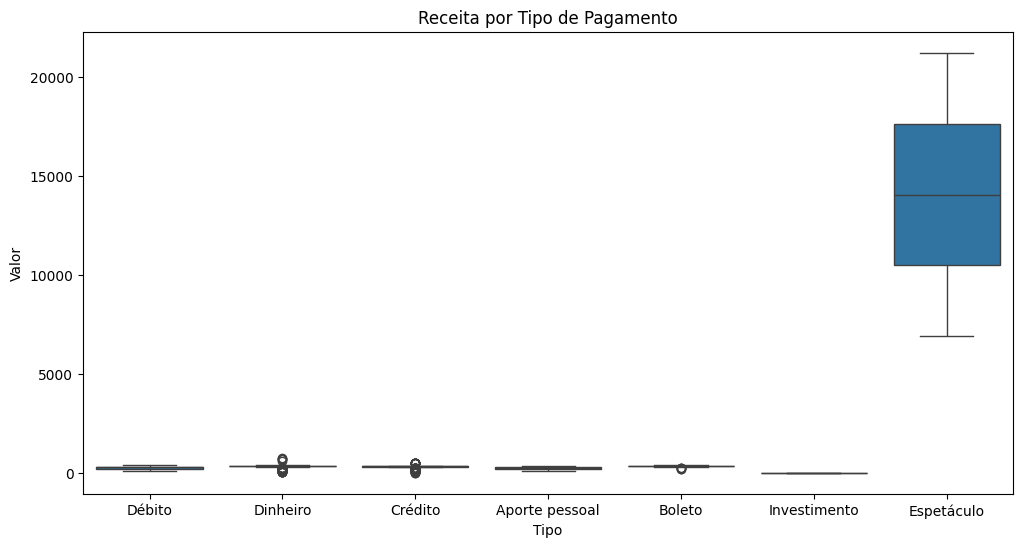

In [ ]:
# Estatísticas descritivas
df_receita.describe(), df_despesa.describe()

# Visualizações básicas
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição das receitas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Valor', data=df_receita)
plt.title('Receita ao longo do tempo')
plt.show()

# Distribuição das despesas ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Valor', data=df_despesa)
plt.title('Despesa ao longo do tempo')
plt.show()

# Boxplot das receitas por tipo de pagamento
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo', y='Valor', data=df_receita)
plt.title('Receita por Tipo de Pagamento')
plt.show()

In [ ]:
# Criar novas features baseadas em datas
df_receita['Ano'] = df_receita['Data'].dt.year
df_receita['Mes'] = df_receita['Data'].dt.month
df_receita['Dia'] = df_receita['Data'].dt.day

df_despesa['Ano'] = df_despesa['Data'].dt.year
df_despesa['Mes'] = df_despesa['Data'].dt.month
df_despesa['Dia'] = df_despesa['Data'].dt.day

# One-hot encoding de variáveis categóricas
df_receita = pd.get_dummies(df_receita, columns=['Tipo'], drop_first=True)

# Exibir as primeiras linhas dos dataframes após a engenharia de features
df_receita.head(), df_despesa.head()

(        Data       Descrição   Valor   Ano  Mes  Dia  Tipo_Boleto  \
 0 2023-01-11  #CLIENTE#23017  244.02  2023    1   11        False   
 1 2023-01-12  #CLIENTE#23018  199.00  2023    1   12        False   
 2 2023-01-13  #CLIENTE#23002  237.12  2023    1   13        False   
 3 2023-01-13  #CLIENTE#23003  237.12  2023    1   13        False   
 4 2023-01-14  #CLIENTE#23007  250.00  2023    1   14        False   
 
    Tipo_Crédito  Tipo_Dinheiro  Tipo_Débito  Tipo_Espetáculo  \
 0         False          False         True            False   
 1         False           True        False            False   
 2          True          False        False            False   
 3          True          False        False            False   
 4         False           True        False            False   
 
    Tipo_Investimento  
 0              False  
 1              False  
 2              False  
 3              False  
 4              False  ,
         Data Descrição   Valor          

In [ ]:
from sklearn.model_selection import train_test_split

# Definir as variáveis independentes (X) e dependente (y)
X = df_receita.drop(columns=['Valor', 'Data', 'Descrição'])
y = df_receita['Valor']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos de dados
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1048, 9), (263, 9), (1048,), (263,))

In [ ]:
from sklearn.linear_model import LinearRegression

# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MAE: 37.34460303135791
MSE: 3744.57962420234
R^2: 0.16730333234365713


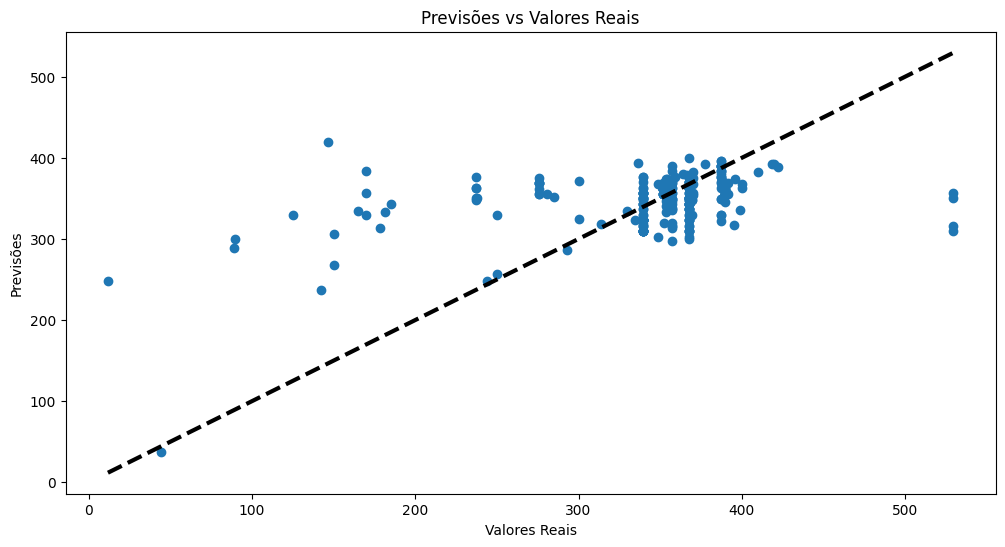

In [ ]:
# Visualizar as previsões vs valores reais
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')
plt.show()

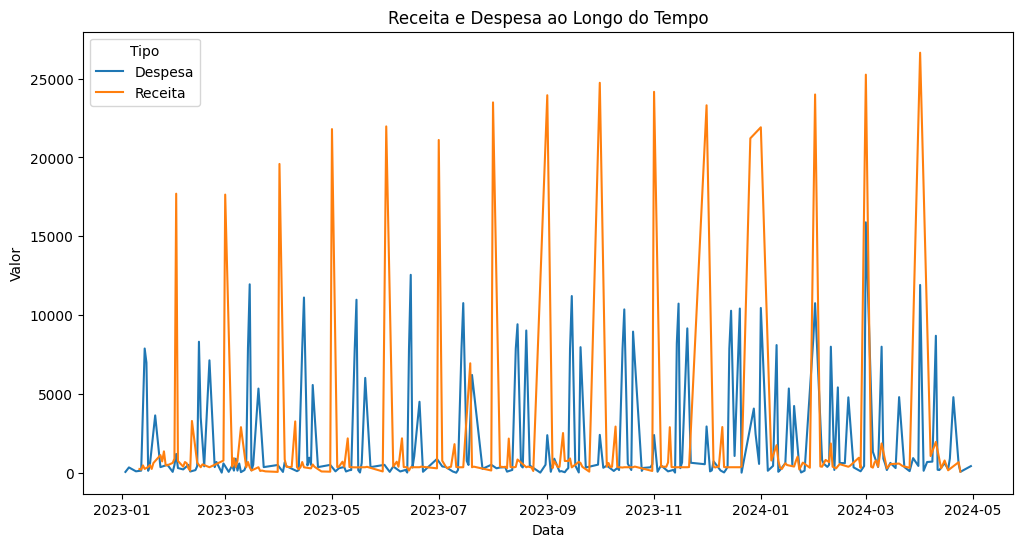

In [ ]:
# Adicionar uma coluna de tipo para identificar receitas e despesas
df_receita['Tipo'] = 'Receita'
df_despesa['Tipo'] = 'Despesa'

# Combinar os dados de receitas e despesas
df_combined = pd.concat([df_receita, df_despesa], ignore_index=True)

# Agrupar os dados por data e tipo, somando os valores
df_grouped = df_combined.groupby(['Data', 'Tipo']).sum().reset_index()

# Criar o gráfico de linha comparando receitas e despesas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Valor', hue='Tipo', data=df_grouped)
plt.title('Receita e Despesa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.show()

#09-Conclusão
##A análise financeira da CBS Dance Factory identificou padrões e forneceu recomendações estratégicas valiosas. O processo incluiu o carregamento e pré-processamento de dados financeiros, análise exploratória (EDA), engenharia de features e modelagem com K-Means. Gráficos revelaram tendências de receitas e despesas ao longo do tempo, destacando períodos de maior e menor fluxo de caixa. O agrupamento dos dados em clusters distintos permitiu a identificação de diferentes comportamentos financeiros, facilitando ações direcionadas.

##Segmentação de Clusters
###Cluster 0:

###Valor Médio: 346,15
###Tipo Mais Frequente: Dinheiro
###Representa transações com valores médios realizadas em dinheiro.
###Cluster 1:

###Valor Médio: 344,20
###Tipo Mais Frequente: Crédito
###Composto principalmente por transações feitas com cartão de crédito.
######Cluster 2:

###Valor Médio: 21.213,05
###Tipo Mais Frequente: Espetáculo
###Inclui transações de alto valor, principalmente associadas a espetáculos.
###Cluster 3:

###Valor Médio: 400,10
###Tipo Mais Frequente: Boleto
###Envolve transações feitas por boleto bancário com valor um pouco superior aos demais clusters comuns.
###Essa segmentação ajuda a entender melhor as dinâmicas de receitas e os perfis de clientes ou eventos que geram diferentes níveis de receita. Esses insights podem ser úteis para estratégias de marketing ou para ajustes nos serviços oferecidos.

###Análise de Receita
###Meses com maiores receitas:

###Julho de 2023
###Dezembro de 2023

##Explicação sobre as receitas positivas nos respectivos meses:

###Julho de 2023:

###Iniciou com um prejuízo de mais de R$6.000,00, mas obteve uma receita positiva de R$6.401,75, já descontado o prejuízo inicial.
###Houve um ótimo retorno de clientes, com o principal método de pagamento sendo o cartão de crédito.
###As despesas foram semelhantes aos outros meses, mas a captação de clientes foi o diferencial, indicando que a fidelidade e captação de clientes são cruciais para uma receita positiva.

###Dezembro de 2023:

###Iniciou com um valor negativo, mas fechou o mês em alta devido a um espetáculo de final de ano que gerou uma receita de mais de R$21.000,00.
###Sazonalidade e eventos específicos são importantes para aumentar a receita.
###Sugere-se investir mais na divulgação desses eventos e ter uma equipe de vendas no evento para converter visitantes em possíveis clientes.

#Ideias para melhorar a conversão de clientes nos meses com prejuízos:

###Segmentação de Clientes: Separar os clientes por tipo de dança, criando conteúdos específicos para cada segmento e enviando ofertas personalizadas.
###Marketing Direto: Manter uma base de dados com números de telefone e e-mails corretos para campanhas de marketing direcionadas.
###Anúncios em Redes Sociais: Investir em anúncios no Instagram (Reels, Stories, Lives) e TikTok, plataformas onde conteúdos sobre dança têm alta visualização.
###Feedback Presencial e Online: Ter uma caixa de feedback na escola e utilizar perguntas em caixinhas nas redes sociais.
###Planejamento de Postagens: Ter uma agenda semanal de postagens nas plataformas digitais.
###Promoções: Oferecer promoções nos meses com menos alunos.
###Parcelamento de Pagamentos: Oferecer opção de boleto parcelado (com juros se necessário), para facilitar o pagamento por parte dos clientes.

#Análise de Despesas
##Despesas Altas:

###Aluguel
###Salários
###Despesas operacionais
###Empréstimos

#Propostas de Melhoria:

###Reduzir o quadro de funcionários nos meses com menos clientes, mantendo uma base de profissionais para cobrir a demanda rapidamente.
###Ajustar o pró-labore de acordo com o rendimento mensal total, para diminuir as despesas nos meses de menor receita.
###Negociar empréstimos para tentar baixar os valores.
###Focar na fidelização dos alunos para construir uma relação duradoura de matrícula.

#Recomendações Estratégicas

###Otimização de Custos: Reduzir despesas em categorias identificadas como excessivas.
###Aumento de Receitas: Implementar promoções em períodos de baixa demanda para maximizar o fluxo de caixa.
###Investimento em Marketing: Melhorar a alocação de recursos de marketing com base na análise de eficácia.

#Próximos Passos

###Monitoramento Contínuo: Atualizar a análise regularmente com novos dados financeiros.
###Ação Estratégica: Implementar recomendações e avaliar seu impacto.
###Análise Avançada: Incluir outras métricas, como satisfação dos clientes, para uma visão mais completa do desempenho do salão.

#Conclusão
###Através desta análise, ficou evidente que a segmentação de clusters, a compreensão das receitas e a gestão eficaz das despesas são essenciais para o sucesso financeiro da CBS Dance Factory. As recomendações propostas visam aumentar a captação e fidelização de clientes, otimizar os métodos de pagamento e reduzir as despesas operacionais. Implementando essas estratégias, a escola poderá maximizar suas receitas, minimizar prejuízos e garantir um crescimento sustentável a longo prazo.